# Modeling - Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
import lightgbm as lgb
import os 
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from itertools import product
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.ensemble import RandomForestRegressor

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

In [2]:
df_test = pd.read_pickle("feature_engineering_test_dataset.pkl")

display(df_test.head(3))
print("Shape: ", df_test.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,dummy_south_dakota,dummy_tennessee,dummy_texas,dummy_utah,dummy_vermont,dummy_virginia,dummy_washington,dummy_west_virginia,dummy_wisconsin,dummy_wyoming
0,2021-02-09,10001,36.782852,15.779060,7.452131,71.744309,63.479295,31.768168,60.557307,40.272843,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-10,10001,33.319952,12.837715,2.041177,72.171535,65.314007,28.528320,63.845535,38.435611,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-11,10001,36.710308,14.203521,2.125673,68.555617,64.170146,31.020100,64.243291,39.718812,...,0,0,0,0,0,0,0,0,0,0


Shape:  (1560, 105)


In [3]:
with open(current_dir + r"\selected_features_RandomForest_experiment_04.pkl", "rb") as f:
    selected_features = pickle.load(f)

In [4]:
target_var = 'smoothed_wcovid_vaccinated'

In [5]:
with open(current_dir + r"\RandomForest_experiment_04.pkl", "rb") as f:
    final_model = pickle.load(f)

In [6]:
X_test = df_test[selected_features]
y_test = df_test[target_var]

In [7]:
y_pred = final_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")

Test RMSE: 2.1425


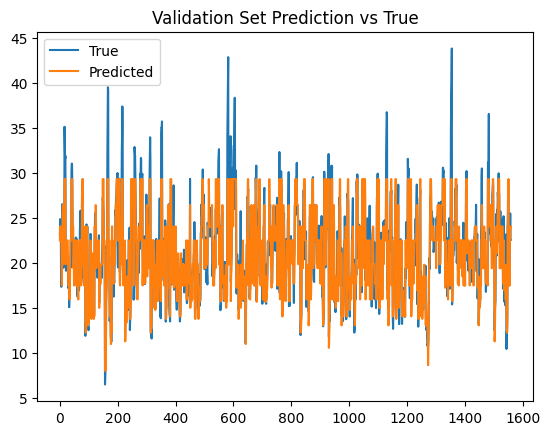

In [8]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label="True")
plt.plot(y_pred, label="Predicted")
plt.title("Validation Set Prediction vs True")
plt.legend()
plt.show()